In [0]:
#importing panda library
import pandas as pd

#importing numpy library
import numpy as np

#importing matplot library
from matplotlib import pyplot as plt

#for train and test split 
from sklearn.model_selection import train_test_split

#for mean_square_error and r2_score packages
#to measure model's performance
from sklearn.metrics import mean_squared_error, r2_score

#importing lubrary to calculate timex
import time

from sklearn import linear_model



Intsalling matplot library

In [270]:
#installing matplotlib
pip install matplotlib

Mounting google drive


In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading file data

In [272]:
#reading file from google drive
dataset = pd.read_csv('/content/drive/My Drive/NLP/housing_assgn.csv')

#removing improper data
dataset = dataset.dropna()

#printing  first ten records of dataset
print("First Ten Records Of Dataset: ")
dataset.head(10)

First Ten Records Of Dataset: 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY



Visual ploting on a line chart

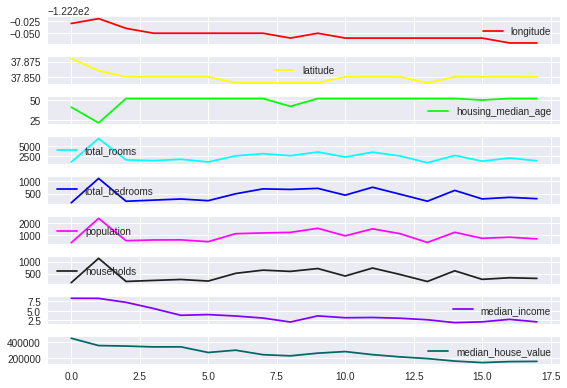

In [273]:
plt.style.use('seaborn')

longitude = dataset['longitude']
latitude = dataset['latitude']
house_mage = dataset['housing_median_age']
total = dataset['total_rooms']
bed = dataset['total_bedrooms']
pop = dataset['population']
households = dataset['households']
m_income = dataset['median_income']
m_value = dataset['median_house_value']

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows=9, ncols=1, sharex=True)
lst1 = [i for i in range(18) ]
ax1.plot(lst1,longitude[:18], color="#FF0000" ,label='longitude')
ax1.legend()

ax2.plot(lst1,latitude[:18], color="#FFFF00" ,label='latitude')
ax2.legend()

ax3.plot(lst1,house_mage[:18], color="#00FF00" ,label='housing_median_age')
ax3.legend()

ax4.plot(lst1,total[:18],color="#00FFFF" ,label='total_rooms')
ax4.legend()

ax5.plot(lst1,bed[:18], color="#0000FF" ,label='total_bedrooms')
ax5.legend()

ax6.plot(lst1,pop[0:18], color="#FF07FF" ,label='population')
ax6.legend()

ax7.plot(lst1,households[0:18],color="#202020" ,label='households')
ax7.legend()

ax8.plot(lst1,m_income[0:18],color="#7F00FF" ,label='median_income')
ax8.legend()

ax9.plot(lst1,m_value[0:18],color="#006666" ,label='median_house_value')
ax9.legend()

plt.tight_layout()
plt.show()



Splitting dataset into X and Y

In [0]:
#output Y as prediction of median house value
Y = dataset['median_house_value']

#selecting rest of inputs as X
X = dataset.loc[:,'longitude':'median_income']

In [275]:
X.shape

(20433, 8)

In [276]:
Y.shape

(20433,)

Split data into training and testing model

In [277]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

print("There are " + str(x_train.size) + " training entries and " 
      +str(x_test.size) + " testing entries.")

There are 114424 training entries and 49040 testing entries.


Calculating mean square error.

In [278]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("The model's mean squared error is: " + str(mse))

The model's mean squared error is: 4778844240.921353


Importing libraries to build network


In [0]:
import torch
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.utils.data import DataLoader, TensorDataset

Defining Model

In [0]:
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)
    self.max_pooling_layer = MaxPool1d(1)
    self.conv_layer = Conv1d(batch_size, 512, 1)
    self.max_pooling_layer1 = MaxPool1d(1)
    self.conv_layer1 = Conv1d(512, 256, 1)
    self.max_pooling_layer2 = MaxPool1d(1)
    self.conv_layer2 = Conv1d(256, 128, 1)
    self.flatten_layer = Flatten()
    self.linear_layer = Linear(128,64)
    self.output_layer = Linear(64, outputs)


  def feed(self, input):
    input = input.reshape((self.batch_size, self.inputs,1))

    output = relu(self.input_layer(input))
    
    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))

    output = self.max_pooling_layer1(output)

    output = relu(self.conv_layer1(output))

    output = self.max_pooling_layer2(output)

    output = relu(self.conv_layer2(output))

    output = self.flatten_layer(output)
    
    output = self.linear_layer(output)
    
    output = self.output_layer(output)

    return output


Importing optimizer and performance measure

In [281]:
from torch.optim import Adam

from torch.nn import L1Loss

!pip install pytorch-ignite

from ignite.contrib.metrics.regression.r2_score import R2Score

Defining Model

In [282]:
batch_size = 64

model = CnnRegressor(batch_size, X.shape[1], 1)

model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 512, kernel_size=(1,), stride=(1,))
  (max_pooling_layer1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer1): Conv1d(512, 256, kernel_size=(1,), stride=(1,))
  (max_pooling_layer2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv1d(256, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

Creating a method for running the batches of data through the model

In [0]:
def model_loss(model, dataset, train = False, optimizer = None):
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataset):
    predections = model.feed(input)

    loss = performance(predections, output)

    score_metric.update([predections, output])
    score = score_metric.compute()

    if(train):
      optimizer.zero_grad()

      loss.backward()

      optimizer.step()
    
    avg_loss += loss.item()

    avg_score += score
    count += 1

  return avg_loss / count, avg_score / count

Training the model

In [284]:
epochs = 600

optimizer = Adam(model.parameters(), lr = 1e-4)
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor,batch_size, shuffle=True, drop_last=True)
time1 = time.time()
for epoch in range(epochs):
  avg_loss, avg_r2_score = model_loss(model, loader, train=True, optimizer=optimizer)
  print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))
time2 = time.time()
print("Total time taken is "+str(time2 - time1) + " seconds " )

Epoch 1:
	Loss = 163409.66570908073
	R^2 Score = -2.7959977446016095
Epoch 2:
	Loss = 117993.42390695067
	R^2 Score = -1.1043430798888385
Epoch 3:
	Loss = 115679.29754063902
	R^2 Score = -0.9893048559287545
Epoch 4:
	Loss = 110842.27764153587
	R^2 Score = -0.9150098224139004
Epoch 5:
	Loss = 101186.52217628923
	R^2 Score = -0.6783695309016968
Epoch 6:
	Loss = 87682.79878433296
	R^2 Score = -0.2035493857761196
Epoch 7:
	Loss = 82395.38405619394
	R^2 Score = 0.09126424617713179
Epoch 8:
	Loss = 81059.15871987108
	R^2 Score = 0.1302478197038446
Epoch 9:
	Loss = 80484.26900574552
	R^2 Score = 0.15751609164059593
Epoch 10:
	Loss = 79890.59035173767
	R^2 Score = 0.1752995366003566
Epoch 11:
	Loss = 79144.57099565583
	R^2 Score = 0.19358247417221047
Epoch 12:
	Loss = 78334.2395774944
	R^2 Score = 0.21844738791031715
Epoch 13:
	Loss = 77660.53869464686
	R^2 Score = 0.24635818588747585
Epoch 14:
	Loss = 76800.43003783633
	R^2 Score = 0.2571037241968737
Epoch 15:
	Loss = 76107.0096517657
	R^2 Sc

Testing Model

In [285]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor,batch_size, shuffle=True, drop_last=True)
avg_loss, avg_r2_score = model_loss(model, loader)
print("Loss = " + str(avg_loss) + "\nR^2 Score = " + str(avg_r2_score))

Loss = 44847.28375822368
R^2 Score = 0.6831815409053447


Saving model

In [286]:
torch.save(model,"/content/drive/My Drive/NLP/1104361_1dconv_reg.pth")
model= torch.load("/content/drive/My Drive/NLP/1104361_1dconv_reg.pth")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CnnRegressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
